In [1]:
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf as compute_acf

from neurodsp.sim import sim_oscillation
from neurodsp.spectral import compute_spectrum

from timescales.sim import sim_ou
from timescales.fit import ACF
from timescales.conversions import convert_knee
from timescales.autoreg import compute_ar_spectrum
from timescales.plts import set_default_rc
set_default_rc()

# ACF Objects

This tutorials explores the use of the ACF objects.

In [2]:
# Settings
n_seconds = 20
fs = 1000
knee_freq = 10
tau = convert_knee(knee_freq)
ar_order = 50

# Simulate a signal
np.random.seed(0)
sig = sim_ou(n_seconds, fs, tau, mu=0, std=2)
sig_osc = sig + sim_oscillation(n_seconds, fs, 20)

In [3]:
# Compute spectrum using method
acf = ACF()
acf.compute_acf(sig, fs)

In [4]:
# Or using an external function
corrs = compute_acf(sig, nlags=200, qstat=False, fft=True)
lags = np.arange(len(corrs))

acf = ACF(lags, corrs, fs)

### Fitting: 1d

PSD objects support two ACF models. The first is a simple exponential decay - appropropriate when no oscillations are present. A second damped cosine model is available when oscillations are present. However, when multiple oscillatons are present, the PSD models is suggested.

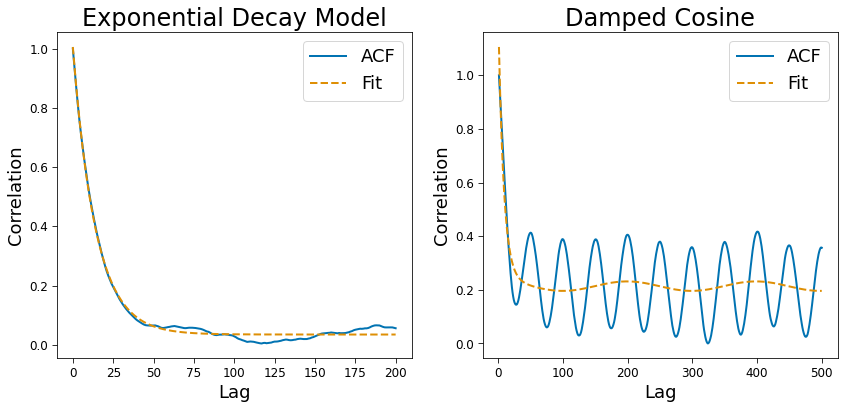

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Exponential
acf.fit()
acf.plot(ax=axes[0], title='Exponential Decay Model')

# Damped cosine
acf_cos = ACF()
acf_cos.compute_acf(sig_osc, fs, nlags=500)
acf_cos.fit(with_cos=True)
acf_cos.plot(ax=axes[1], title='Damped Cosine')

### Fitting: 2d

2d arrays of signals or correlations are supported.

In [6]:
# Simulate
np.random.seed(0)
fs = 1000
n_seconds = 5

nsigs = 20

sigs = np.zeros((nsigs, int(n_seconds * fs)))

for ind in range(nsigs):
    np.random.seed(ind)
    sigs[ind] = sim_ou(n_seconds, fs, tau, mu=0, std=2)
    sigs[ind] += sim_oscillation(n_seconds, fs, knee_freq)

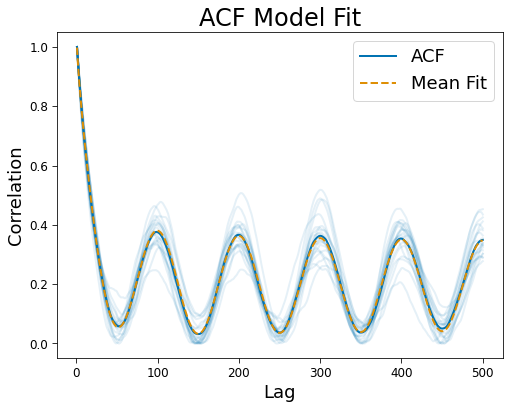

In [7]:
# Fit
acf = ACF()
acf.compute_acf(sigs, fs, nlags=500)
acf.fit(with_cos=True)
acf.plot()

### Results

In [8]:
acf.param_names

['exp_tau',
 'osc_tau',
 'osc_gamma',
 'osc_freq',
 'amp_ratio',
 'height',
 'offset']

In [9]:
acf.params[:5]

array([[1.41596274e-02, 5.75828900e-02, 1.00000000e-01, 4.96851887e+00,
        6.11214625e-01, 7.78241857e-01, 2.19397589e-01],
       [1.78506249e-02, 3.44993307e-05, 2.96296520e-12, 5.00368526e+00,
        8.07856339e-01, 7.74575854e-01, 1.86776492e-01],
       [1.94496772e-02, 9.99999989e-01, 9.60349691e-02, 5.00253943e+00,
        7.34143279e-01, 8.31915435e-01, 1.78194125e-01],
       [1.75063738e-02, 4.35207947e-03, 7.12521139e-04, 4.99162831e+00,
        8.10755871e-01, 7.76777111e-01, 2.05387302e-01],
       [1.50673823e-02, 9.99999997e-01, 1.17410465e-13, 5.00554451e+00,
        7.77721345e-01, 8.14000705e-01, 1.95504667e-01]])